In [41]:
import os
import json

def get_category_files(base_path, target_styles, data_type='image', max_files=None):
    """
    특정 카테고리의 파일들을 수집하고 정렬하는 함수
    
    Args:
        base_path (str): 기본 경로
        target_styles (list): 처리할 카테고리 리스트
        data_type (str): 'image' 또는 'label' (기본값: 'image')
        max_files (dict): 각 카테고리별 최대 파일 수 (기본값: None)
    
    Returns:
        dict: 카테고리별 정렬된 파일 경로 딕셔너리
    """
    category_files = {}
    
    for style in target_styles:
        style_path = os.path.join(base_path, style)
        if not os.path.isdir(style_path):
            print(f"경고: {style} 카테고리 폴더가 존재하지 않습니다.")
            continue
            
        if data_type == 'image':
            # 이미지 파일 수집 및 정렬
            files = [os.path.join(style_path, f) for f in os.listdir(style_path) 
                    if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            files.sort()  # 파일 경로 기준 정렬
        elif data_type == 'label':
            # JSON 파일 수집 및 정렬
            files = [os.path.join(style_path, f) for f in os.listdir(style_path) 
                    if f.lower().endswith('.json')]
            files.sort()  # 파일 경로 기준 정렬
        else:
            raise ValueError("data_type은 'image' 또는 'label'이어야 합니다.")
        
        # 최대 파일 수 제한
        if max_files and style in max_files:
            files = files[:max_files[style]]
            
        category_files[style] = files
    
    # 결과 출력
    for style, files in category_files.items():
        print(f"\n{style} 스타일:")
        print(f"파일 개수: {len(files)}개")
        if files:
            if data_type == 'image':
                print("첫 번째 이미지:", os.path.basename(files[0]))
            else:
                try:
                    with open(files[0], 'r', encoding='utf-8') as f:
                        json_data = json.load(f)
                    print("첫 번째 JSON 파일:", os.path.basename(files[0]))
                    print("JSON 키:", list(json_data.keys()))
                except:
                    print("JSON 파일 읽기 실패:", os.path.basename(files[0]))
    
    return category_files

# 사용 예시
base_path = "E:/Workspace/K-fashion/image"
# base_path = "./k_fashsion/원천데이터/원천데이터_1"
target_styles = ['Street', 'Genderless']
max_files = {'Street': 6000, 'Genderless': 2000}

# 이미지 파일 수집
image_files = get_category_files(base_path, target_styles, data_type='image', max_files=max_files)

# 라벨 파일 수집
label_path = "E:/Workspace/K-fashion/label"
# label_path = "./k_fashsion/라벨링데이터"
label_files = get_category_files(label_path, target_styles, data_type='label',max_files=max_files)


Street 스타일:
파일 개수: 6000개
첫 번째 이미지: 1.jpg

Genderless 스타일:
파일 개수: 2000개
첫 번째 이미지: 1004302.jpg

Street 스타일:
파일 개수: 6000개
첫 번째 JSON 파일: 1.json
JSON 키: ['이미지 정보', '데이터셋 정보']

Genderless 스타일:
파일 개수: 2000개
첫 번째 JSON 파일: 1004302.json
JSON 키: ['이미지 정보', '데이터셋 정보']


In [42]:
# image_files 딕셔너리의 모든 경로를 수정
for style, paths in image_files.items():
    image_files[style] = [path.replace('\\', '/') for path in paths]

# 수정된 경로 출력 (확인용)
image_files

{'Street': ['E:/Workspace/K-fashion/image/Street/1.jpg',
  'E:/Workspace/K-fashion/image/Street/1000000.jpg',
  'E:/Workspace/K-fashion/image/Street/1000001.jpg',
  'E:/Workspace/K-fashion/image/Street/1000002.jpg',
  'E:/Workspace/K-fashion/image/Street/1000003.jpg',
  'E:/Workspace/K-fashion/image/Street/1000006.jpg',
  'E:/Workspace/K-fashion/image/Street/1000007.jpg',
  'E:/Workspace/K-fashion/image/Street/1000008.jpg',
  'E:/Workspace/K-fashion/image/Street/1000009.jpg',
  'E:/Workspace/K-fashion/image/Street/1000010.jpg',
  'E:/Workspace/K-fashion/image/Street/1000011.jpg',
  'E:/Workspace/K-fashion/image/Street/1000012.jpg',
  'E:/Workspace/K-fashion/image/Street/1000013.jpg',
  'E:/Workspace/K-fashion/image/Street/1000016.jpg',
  'E:/Workspace/K-fashion/image/Street/1000017.jpg',
  'E:/Workspace/K-fashion/image/Street/1000018.jpg',
  'E:/Workspace/K-fashion/image/Street/1000019.jpg',
  'E:/Workspace/K-fashion/image/Street/1000020.jpg',
  'E:/Workspace/K-fashion/image/Street/100

In [43]:
# label_files 딕셔너리의 모든 경로를 수정
for style, paths in label_files.items():
    label_files[style] = [path.replace('\\', '/') for path in paths]
    
# 수정된 경로 출력 (확인용)
label_files

{'Street': ['E:/Workspace/K-fashion/label/Street/1.json',
  'E:/Workspace/K-fashion/label/Street/1000000.json',
  'E:/Workspace/K-fashion/label/Street/1000001.json',
  'E:/Workspace/K-fashion/label/Street/1000002.json',
  'E:/Workspace/K-fashion/label/Street/1000003.json',
  'E:/Workspace/K-fashion/label/Street/1000006.json',
  'E:/Workspace/K-fashion/label/Street/1000007.json',
  'E:/Workspace/K-fashion/label/Street/1000008.json',
  'E:/Workspace/K-fashion/label/Street/1000009.json',
  'E:/Workspace/K-fashion/label/Street/1000010.json',
  'E:/Workspace/K-fashion/label/Street/1000011.json',
  'E:/Workspace/K-fashion/label/Street/1000012.json',
  'E:/Workspace/K-fashion/label/Street/1000013.json',
  'E:/Workspace/K-fashion/label/Street/1000016.json',
  'E:/Workspace/K-fashion/label/Street/1000017.json',
  'E:/Workspace/K-fashion/label/Street/1000018.json',
  'E:/Workspace/K-fashion/label/Street/1000019.json',
  'E:/Workspace/K-fashion/label/Street/1000020.json',
  'E:/Workspace/K-fashio

In [33]:
category_names = [
    "Top", "Blouse", "Casual Top", "Knitwear", "Shirt", "Vest",
    "Coat", "Jacket", "Jumper", "Padding",
    "Jeans", "Pants", "Skirt", "Leggings",
    "Dress", "Jumpsuit", "Swimsuit"
    ]

print(len(category_names))

17


100%|██████████| 1600/1600 [00:01<00:00, 875.41it/s]


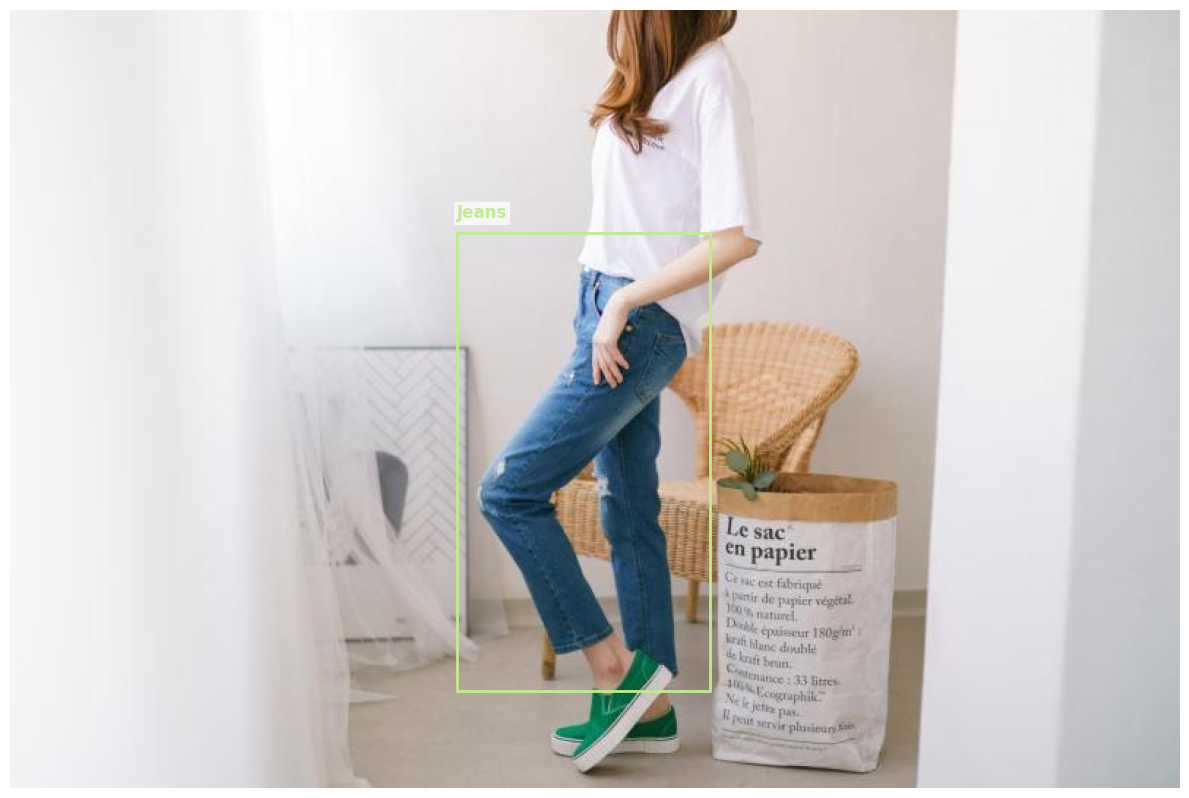

In [54]:
import os
import json
import shutil
import numpy as np
from PIL import Image, ImageDraw
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

def create_dataset_structure():
    """데이터셋 폴더 구조 생성"""
    dirs = [
        "datasets/images/train", "datasets/labels/train",
        "datasets/masks/train", "datasets/reg_labels/train",
        "datasets/images/val", "datasets/labels/val",
        "datasets/masks/val", "datasets/reg_labels/val"
    ]
    for d in dirs:
        os.makedirs(d, exist_ok=True)

def create_reg_label(label_data):
    """회귀 라벨 생성"""
    reg_info = {
        "아우터": {
            "기장": None, "색상": None, "카테고리": None,
            "소매기장": None, "소재": [], "프린트": [],
            "넥라인": None, "핏": None
        },
        "상의": {
            "기장": None, "색상": None, "카테고리": None,
            "소매기장": None, "소재": [], "프린트": [],
            "넥라인": None, "핏": None
        },
        "하의": {
            "기장": None, "색상": None,  "카테고리": None,
            "소재": [], "프린트": [], "핏": None
        },
        "원피스": {
            "기장": None, "색상": None, "카테고리": None,
            "소매기장": None, "소재": [], "프린트": [],
            "넥라인": None, "핏": None
        },
        "스타일": None
    }
    
    # 스타일 정보 추출
    style_info = label_data.get("데이터셋 정보", {}).get("데이터셋 상세설명", {}).get("라벨링", {}).get("스타일", [])
    if style_info and isinstance(style_info, list) and len(style_info) > 0:
        reg_info["스타일"] = style_info[0].get("스타일", None)
    
    # 각 의류 카테고리 정보 추출
    categories = ["아우터", "상의", "하의", "원피스"]
    for category in categories:
        cat_info = label_data.get("데이터셋 정보", {}).get("데이터셋 상세설명", {}).get("라벨링", {}).get(category, [{}])[0]
        if cat_info:
            for key, value in cat_info.items():
                if key in reg_info[category]:
                    reg_info[category][key] = value
    
    return reg_info

def convert_to_yolo_format(rect_coords, img_width, img_height):
    """렉트 좌표를 YOLO 포맷으로 변환"""
    x = rect_coords["X좌표"]
    y = rect_coords["Y좌표"]
    w = rect_coords["가로"]
    h = rect_coords["세로"]
    
    x_center = (x + w/2) / img_width
    y_center = (y + h/2) / img_height
    width = w / img_width
    height = h / img_height
    
    return [x_center, y_center, width, height]

# def create_mask_from_polygon(polygon_coords, img_width, img_height):
#     """폴리곤 좌표로부터 마스크 생성"""
#     mask = Image.new('L', (img_width, img_height), 0)
#     draw = ImageDraw.Draw(mask)
    
#     points = []
#     sorted_coords = sorted([(k, v) for k, v in polygon_coords.items()], 
#                          key=lambda x: int(''.join(filter(str.isdigit, x[0]))))
    
#     for i in range(len(sorted_coords)//2):
#         x = sorted_coords[i][1]
#         y = sorted_coords[i + len(sorted_coords)//2][1]
#         points.append((x, y))
    
#     draw.polygon(points, fill=255)
#     return mask

def process_files(image_files, label_files, split='train'):
    """전체 파일 처리"""
    create_dataset_structure()
    
    # 의류 카테고리 세분화
    categories = {
        "탑": 0,
        "블라우스": 1,
        "캐주얼상의": 2,
        "니트웨어": 3,
        "셔츠": 4,
        "베스트": 5,
        "코트": 6,
        "재킷": 7,
        "점퍼": 8,
        "패딩": 9,
        "청바지": 10,
        "팬츠": 11,
        "스커트": 12,
        "레깅스": 13,
        "드레스": 14,
        "점프수트": 15,
        "수영복": 16
    }
    
    processed_files = []
    filename_mapping = {}
    counter = 1
    
    # 모든 이미지 파일을 하나의 리스트로 통합
    all_images = []
    for img_paths in image_files.values():
        all_images.extend(img_paths)
    
    for img_path in tqdm(sorted(all_images)):
        orig_basename = Path(img_path).stem
        new_basename = f"{counter:06d}"
        filename_mapping[orig_basename] = new_basename
        counter += 1
        
        # 이미지 복사
        new_img_path = os.path.abspath(f"datasets/images/{split}/{new_basename}.jpg")
        shutil.copy2(img_path, new_img_path)
        
        # 라벨 찾기
        label_path = None
        for style_labels in label_files.values():
            label_path = next((p for p in style_labels if orig_basename in p), None)
            if label_path:
                break
                
        if label_path:
            with open(label_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
            
            img_info = data["이미지 정보"]
            img_width = img_info["이미지 너비"]
            img_height = img_info["이미지 높이"]
            
            labels = []
            rect_coords = data["데이터셋 정보"]["데이터셋 상세설명"]["렉트좌표"]
            category_info = data["데이터셋 정보"]["데이터셋 상세설명"]["라벨링"]
            
            # 각 의류 타입에 대해 처리
            for cloth_type in ["상의", "하의", "아우터", "원피스"]:
                if rect_coords[cloth_type] and rect_coords[cloth_type][0]:  # 좌표가 있는 경우
                    coords = rect_coords[cloth_type][0]
                    category = category_info[cloth_type][0].get("카테고리", "")
                    if category in categories:  # 세분화된 카테고리에 있는 경우
                        yolo_coords = convert_to_yolo_format(coords, img_width, img_height)
                        labels.append([categories[category]] + yolo_coords)
            
            if labels:
                # YOLO 형식 라벨 저장
                new_label_path = os.path.abspath(f"datasets/labels/{split}/{new_basename}.txt")
                with open(new_label_path, 'w') as f:
                    for label in labels:
                        f.write(' '.join(map(str, label)) + '\n')
                        
            processed_files.append((new_basename, labels))
    category_names = [
    "Top", "Blouse", "Casual Top", "Knitwear", "Shirt", "Vest",
    "Coat", "Jacket", "Jumper", "Padding",
    "Jeans", "Pants", "Skirt", "Leggings",
    "Dress", "Jumpsuit", "Swimsuit"
    ]
    return processed_files, filename_mapping, category_names


def visualize_bbox(img_path, label_path, category_names):
    """바운딩 박스 시각화"""
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width = img.shape[:2]
    
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(category_names)))
    
    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    for line in lines:
        category_id, x_center, y_center, w, h = map(float, line.strip().split())
        
        abs_x = int(x_center * width)
        abs_y = int(y_center * height)
        abs_w = int(w * width)
        abs_h = int(h * height)
        x1 = abs_x - abs_w//2
        y1 = abs_y - abs_h//2
        
        color = colors[int(category_id)]
        rect = plt.Rectangle((x1, y1), abs_w, abs_h,
                           fill=False,
                           color=color,
                           linewidth=2)
        plt.gca().add_patch(rect)
        
        label = category_names[int(category_id)]
        plt.text(x1, y1-10, label,
                color=color,
                fontsize=12,
                fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=2))
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 실행
processed_files, filename_mapping, category_names = process_files(image_files, label_files, split='train')

# 결과 확인
if processed_files:
    first_file = processed_files[0]
    img_path = os.path.abspath(f"datasets/images/train/{first_file[0]}.jpg")
    label_path = os.path.abspath(f"datasets/labels/train/{first_file[0]}.txt")
    visualize_bbox(img_path, label_path, category_names)

In [ ]:

# 실행
processed_files, filename_mapping, category_names = process_files(image_files, label_files, split='train')

# 결과 확인
if processed_files:
    first_file = processed_files[0]
    img_path = os.path.abspath(f"datasets/images/train/{first_file[0]}.jpg")
    label_path = os.path.abspath(f"datasets/labels/train/{first_file[0]}.txt")
    visualize_bbox(img_path, label_path, category_names)

100%|██████████| 8000/8000 [00:09<00:00, 830.67it/s]


ValueError: not enough values to unpack (expected 3, got 2)

# Validation Set


스트리트 스타일:
파일 개수: 1200개
첫 번째 이미지: 1000005.jpg

젠더리스 스타일:
파일 개수: 400개
첫 번째 이미지: 1004301.jpg

스트리트 스타일:
파일 개수: 1200개
첫 번째 JSON 파일: 1000005.json
JSON 키: ['이미지 정보', '데이터셋 정보']

젠더리스 스타일:
파일 개수: 400개
첫 번째 JSON 파일: 1004301.json
JSON 키: ['이미지 정보', '데이터셋 정보']


100%|██████████| 1600/1600 [00:01<00:00, 888.17it/s]


KeyError: 10

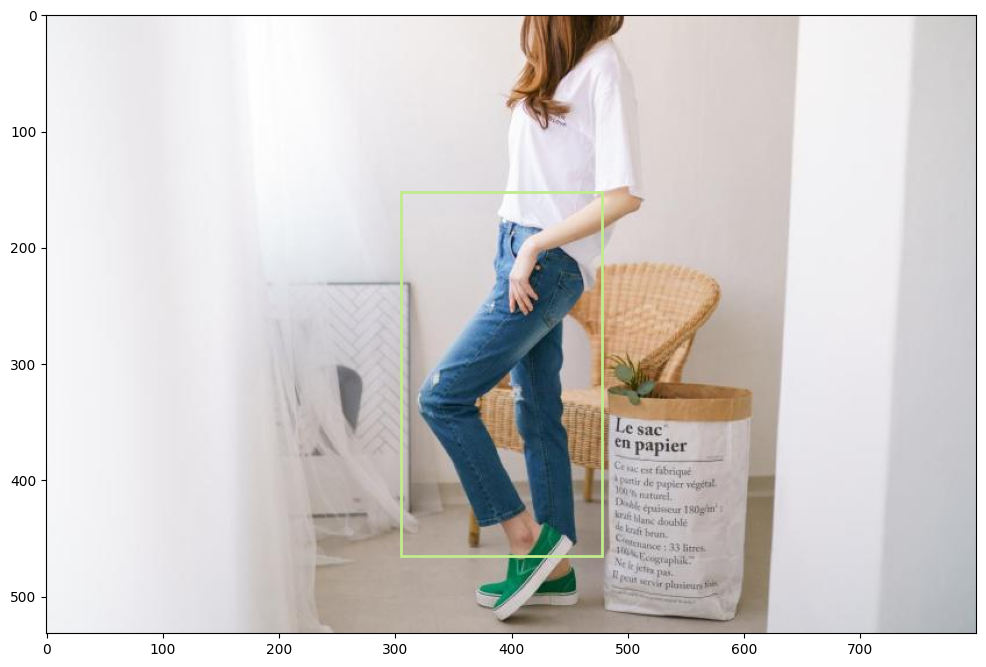

In [53]:
# 사용 예시
base_path = "E:/Workspace/K-fashion_valid/원천데이터"
target_styles = ['스트리트', '젠더리스']
max_files = {'스트리트': 1200, '젠더리스': 400}

# 이미지 파일 수집
image_files = get_category_files(base_path, target_styles, data_type='image', max_files=max_files)

# 라벨 파일 수집
label_path = "E:/Workspace/K-fashion_valid/라벨링데이터"
label_files = get_category_files(label_path, target_styles, data_type='label',max_files=max_files)

# 실행
processed_files, filename_mapping, category_names = process_files(image_files, label_files, split='val')

# 결과 확인
if processed_files:
    first_file = processed_files[0]
    img_path = f"datasets/images/val/{first_file[0]}.jpg"
    label_path = f"datasets/labels/val/{first_file[0]}.txt"
    visualize_bbox(img_path, label_path, category_names)

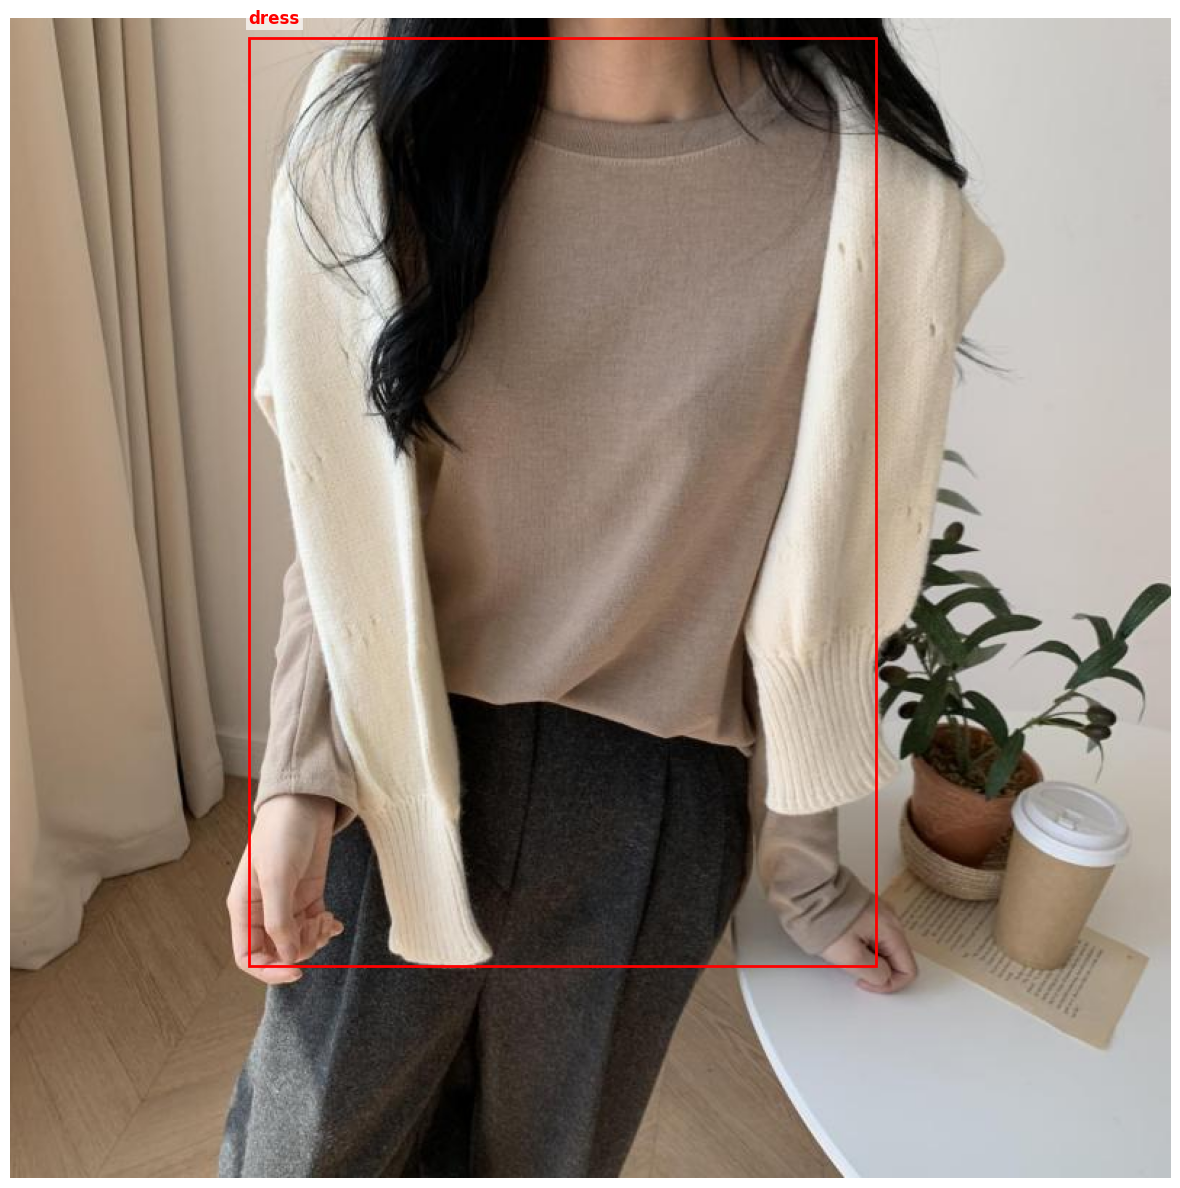

In [49]:
# 결과 확인

first_file = processed_files[1]
img_path = f"datasets/images/train/{first_file[0]}.jpg"
label_path = f"datasets/labels/train/{first_file[0]}.txt"
visualize_bbox(img_path, label_path, category_names)

ㄴ